In [91]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=2bf971f3f89ac4106d2df534b41ff7b6170e6a6992796693f803618ca5245203
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas_ta


In [105]:
# New start
# Katsaros Project
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score, mean_absolute_percentage_error
import warnings
import pandas_ta as ta

warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('bitcoin.csv')

# Convert 'date' column to datetime and sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df.reset_index(drop=True, inplace=True)

df['next_close'] = df['close'].shift(-1)

# Define the target column as 'next_close' - 'close'
df['target'] = df['next_close'] - df['close']

df.dropna(inplace=True)

# Drop unecessary columns
df = df[['date', 'close', 'target', 'open', 'high', 'low', 'next_close']]

# Adding indicators
df['RSI'] = ta.rsi(df['close'], window=15)
df['EMAF'] = ta.ema(df['close'], window=20)
df['EMAM'] = ta.ema(df['close'], window=100)
df['EMAS'] = ta.ema(df['close'], window=150)

# Scale the 'close' values
scaler = MinMaxScaler(feature_range=(0, 1))

columns = ['close', 'target', 'open', 'high', 'low', 'next_close', 'RSI', 'EMAF', 'EMAM', 'EMAS']
for col in columns:
    df[col] = scaler.fit_transform(df[[col]])

df

,date,close,target,open,high,low,next_close,RSI,EMAF,EMAM,EMAS
0,2021-01-01 00:01:00,0.024689,0.656831,0.022332,0.016979,0.031006,0.023526,NaN,NaN,NaN,NaN
1,2021-01-01 00:02:00,0.023526,0.666287,0.023859,0.016637,0.031514,0.023825,NaN,NaN,NaN,NaN
2,2021-01-01 00:03:00,0.023825,0.663887,0.023074,0.016548,0.031291,0.023754,NaN,NaN,NaN,NaN
3,2021-01-01 00:04:00,0.023754,0.657130,0.023329,0.016260,0.031696,0.022637,NaN,NaN,NaN,NaN
4,2021-01-01 00:05:00,0.022637,0.664014,0.022687,0.015414,0.030398,0.022585,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
610776,2022-03-01 03:37:00,0.366895,0.658115,0.366324,0.361913,0.373660,0.365931,0.561161,0.357179,0.357179,0.357179
610777,2022-03-01 03:38:00,0.365931,0.656446,0.366302,0.361562,0.372948,0.364708,0.478611,0.357050,0.357050,0.357050
610778,2022-03-01 03:39:00,0.364708,0.666974,0.365259,0.360511,0.371730,0.365114,0.398368,0.356716,0.356716,0.356716
610779,2022-03-01 03:40:00,0.365114,0.669181,0.364943,0.360193,0.372133,0.365860,0.432080,0.356518,0.356518,0.356518


In [106]:
# Insert lag features
for i in range(1, 4):
    df[f'close_lag_{i}'] = df['close'].shift(i)

# Insert rolling averages
for i in [5, 10, 15]:
    df[f'close_ma_{i}'] = df['close'].rolling(window=i).mean()

df.dropna(inplace=True)
df

,date,close,target,open,high,low,next_close,RSI,EMAF,EMAM,EMAS,close_lag_1,close_lag_2,close_lag_3,close_ma_5,close_ma_10,close_ma_15
14,2021-01-01 00:15:00,0.018384,0.675083,0.017559,0.010973,0.025981,0.020043,0.148782,0.000506,0.000506,0.000506,0.018611,0.018032,0.020187,0.019027,0.020330,0.021449
15,2021-01-01 00:16:00,0.020043,0.663590,0.018463,0.012212,0.027040,0.019925,0.350829,0.000468,0.000468,0.000468,0.018384,0.018611,0.018032,0.019052,0.020076,0.021139
16,2021-01-01 00:17:00,0.019925,0.665911,0.019040,0.012212,0.027387,0.020166,0.344500,0.000415,0.000415,0.000415,0.020043,0.018384,0.018611,0.018999,0.019827,0.020899
17,2021-01-01 00:18:00,0.020166,0.667219,0.019545,0.012572,0.027553,0.020610,0.369268,0.000416,0.000416,0.000416,0.019925,0.020043,0.018384,0.019426,0.019722,0.020655
18,2021-01-01 00:19:00,0.020610,0.650333,0.019758,0.012782,0.027905,0.018443,0.413197,0.000500,0.000500,0.000500,0.020166,0.019925,0.020043,0.019826,0.019670,0.020446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610776,2022-03-01 03:37:00,0.366895,0.658115,0.366324,0.361913,0.373660,0.365931,0.561161,0.357179,0.357179,0.357179,0.366935,0.366754,0.367127,0.366967,0.366877,0.366129
610777,2022-03-01 03:38:00,0.365931,0.656446,0.366302,0.361562,0.372948,0.364708,0.478611,0.357050,0.357050,0.357050,0.366895,0.366935,0.366754,0.366728,0.366881,0.366190
610778,2022-03-01 03:39:00,0.364708,0.666974,0.365259,0.360511,0.371730,0.365114,0.398368,0.356716,0.356716,0.356716,0.365931,0.366895,0.366935,0.366245,0.366719,0.366139
610779,2022-03-01 03:40:00,0.365114,0.669181,0.364943,0.360193,0.372133,0.365860,0.432080,0.356518,0.356518,0.356518,0.364708,0.365931,0.366895,0.365916,0.366530,0.366162


In [107]:
# iqr method to remove outliers
# Function to replace outliers using IQR method
# and print the number of replaced outliers.
def replace_outliers_with_threshold(df, threshold=1):
    df_cleaned = df.copy()
    outliers_replaced = {}

    for col in df_cleaned.select_dtypes(include=[np.number]).columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)

        # Count the number of outliers before replacement
        outliers_before = ((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)).sum()

        # Replace outliers with the threshold values (lower and upper bounds)
        df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound,
                                   np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col]))

        # Count the number of outliers after replacement (should be zero)
        outliers_after = ((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)).sum()

        # Store the number of outliers replaced for this column
        outliers_replaced[col] = outliers_before

        if outliers_before > 0:
            print(f"Column '{col}': {outliers_before} outliers replaced.")

    return df_cleaned, outliers_replaced

replace_outliers_with_threshold(df)

Column 'target': 70523 outliers replaced.
Column 'RSI': 28889 outliers replaced.


(                      date     close    target      open      high       low  \
 14     2021-01-01 00:15:00  0.018384  0.675083  0.017559  0.010973  0.025981   
 15     2021-01-01 00:16:00  0.020043  0.663590  0.018463  0.012212  0.027040   
 16     2021-01-01 00:17:00  0.019925  0.665911  0.019040  0.012212  0.027387   
 17     2021-01-01 00:18:00  0.020166  0.667219  0.019545  0.012572  0.027553   
 18     2021-01-01 00:19:00  0.020610  0.652255  0.019758  0.012782  0.027905   
 ...                    ...       ...       ...       ...       ...       ...   
 610776 2022-03-01 03:37:00  0.366895  0.658115  0.366324  0.361913  0.373660   
 610777 2022-03-01 03:38:00  0.365931  0.656446  0.366302  0.361562  0.372948   
 610778 2022-03-01 03:39:00  0.364708  0.666974  0.365259  0.360511  0.371730   
 610779 2022-03-01 03:40:00  0.365114  0.669181  0.364943  0.360193  0.372133   
 610780 2022-03-01 03:41:00  0.365860  0.664352  0.364845  0.360792  0.372187   
 
         next_close       

In [108]:
# Extract date-based features
df['Day'] = pd.to_datetime(df['date']).dt.day
df['Dayofweek'] = pd.to_datetime(df['date']).dt.dayofweek
df['Dayofyear'] = pd.to_datetime(df['date']).dt.dayofyear
df['Is_month_end'] = pd.to_datetime(df['date']).dt.is_month_end.astype(int)
df['Is_month_start'] = pd.to_datetime(df['date']).dt.is_month_start.astype(int)
df['Is_quarter_end'] = pd.to_datetime(df['date']).dt.is_quarter_end.astype(int)
df['Is_quarter_start'] = pd.to_datetime(df['date']).dt.is_quarter_start.astype(int)
df['Is_year_end'] = pd.to_datetime(df['date']).dt.is_year_end.astype(int)
df['Is_year_start'] = pd.to_datetime(df['date']).dt.is_year_start.astype(int)

In [109]:
import numpy as np
import pandas as pd

# Define training and test periods
train_data = df[df['date'] <= '2022-02-18']
test_data = df[(df['date'] >= '2022-02-19') & (df['date'] <= '2022-02-28')]

# Drop 'date' column if it exists
train_data = train_data.drop(columns=['date'], errors='ignore')
test_data = test_data.drop(columns=['date'], errors='ignore')

# Define window size
window_size = 5

# Function to create sequences for multivariate time series
def create_multivariate_sequences(data, feature_columns, target_column, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        # Select feature columns for the given window size
        X.append(data.iloc[i:i + window_size].values)
        # Select the target column value at `i + window_size`
        y.append(data.iloc[i + window_size][target_column])
    return np.array(X), np.array(y)

# Select the feature columns (excluding target)
feature_columns = ['close', 'open', 'high', 'low', 'close_lag_1', 'close_lag_2', 'close_lag_3',\
                   'next_close', 'close_ma_5', 'close_ma_10', 'close_ma_15', 'Day', 'Dayofweek',\
                   'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',\
                   'Is_year_end', 'Is_year_start', 'RSI', 'EMAF', 'EMAM', 'EMAS']
target_column = 'target'  # Define target column name

# Create sequences for training and test data
X_train, y_train = create_multivariate_sequences(train_data, feature_columns, target_column, window_size)
X_test, y_test = create_multivariate_sequences(test_data, feature_columns, target_column, window_size)

X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

# X should already be in shape [samples, time steps, features]
print("X_train shape:", X_train.shape)  # (num_samples, window_size, num_features)
print("X_test shape:", X_test.shape)  # (num_samples, window_size, num_features)
print("y_train shape:", y_train.shape)  # (num_samples,)
print("y_test shape:", y_test.shape)  # (num_samples,)

X_train shape: (594701, 5, 25)
X_test shape: (12956, 5, 25)
y_train shape: (594701,)
y_test shape: (12956,)


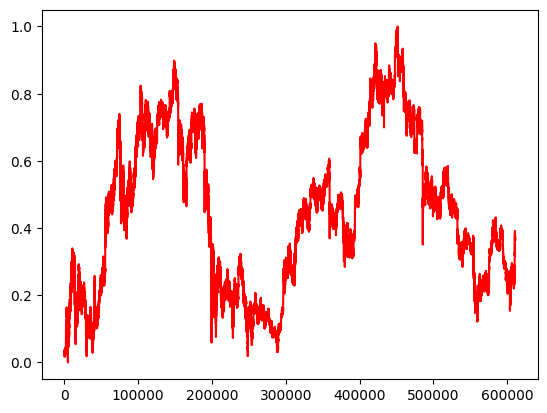

In [110]:
# Plot the bitcoin
plt.plot(df.index, df['close'], 'r-')
plt.show()

In [111]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping
# Early stopping is responsible to stop
# training the model if the validation
# loss doesn't improve after 5 iterations
early_stop = EarlyStopping(
    monitor='val_loss',       # Metric to monitor (validation loss)
    patience=5,               # Number of epochs to wait before stopping
    restore_best_weights=True # Restore the best model weights
)

# Define the LSTM Model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(window_size, len(feature_columns)+1), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model incorporating Early Stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
7434/7434 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.4154 - mae: 0.0635 - val_loss: 0.0038 - val_mae: 0.0404
Epoch 2/50
7434/7434 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 3.2252e-04 - mae: 0.0118 - val_loss: 1.0275e-04 - val_mae: 0.0057
Epoch 3/50
7434/7434 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 1.0609e-04 - mae: 0.0071 - val_loss: 5.1489e-05 - val_mae: 0.0046
Epoch 4/50
7434/7434 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 9.4720e-05 - mae: 0.0064 - val_loss: 5.3686e-05 - val_mae: 0.0048
Epoch 5/50
7434/7434 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 9.3415e-05 - mae: 0.0064 - val_loss: 5.3290e-05 - val_mae: 0.0048
Epoch 6/50
7434/7434 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 9.1523e-05 - mae: 0.0064 - val_loss: 5.7042e-05 - val_mae: 0.0051
Epoch 7/50
7434/7434 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 9.2229e-05 - mae: 0.0064 - val_loss: 5.4358e-05 - val_mae: 0.0049
Epoch 8/50
7434/7434 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 9.2089e-05 - mae: 0.0064 - val_loss: 5.385

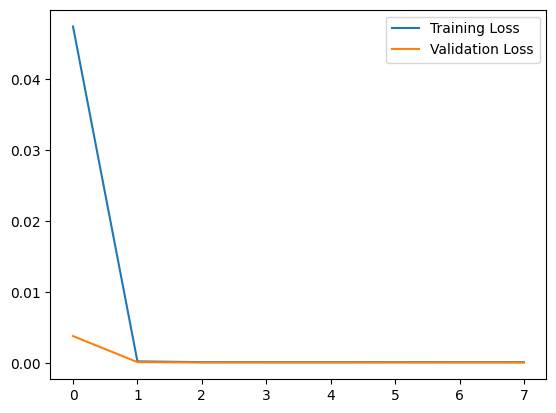

In [112]:
# Plot loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.show()

405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.6479e-05 - mae: 0.0038
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6479e-05 - mae: 0.0038
Test MAE: 0.0045406753197312355
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


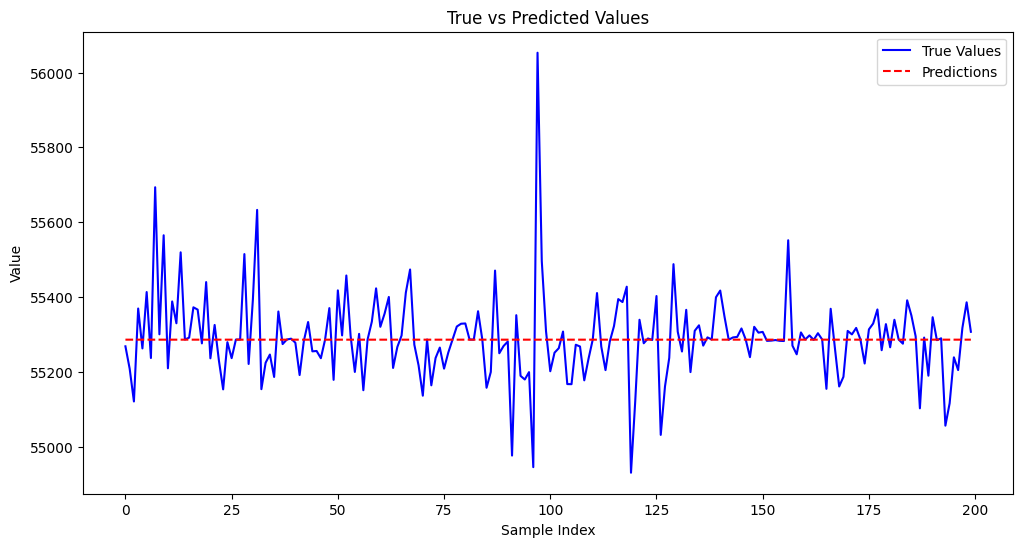

Mean Squared Error (MSE): 76681.086
Mean Absolute Error (MAE): 180.469
R-squared (R2): -0.00001
Mean Absolute Percentage Error (MAPE): 0.326%
Explained Variance Score (EVS): 0.00000
Root Mean Squared Error (RMSE): 276.913


In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score, mean_absolute_percentage_error

# Make predictions
model.evaluate(X_test, y_test)
print(f"Test MAE: " + str(model.evaluate(X_test, y_test)[1]))

# Predictions for the test data
y_pred = model.predict(X_test)

# Rescale the predictions and actual values back to original scale
y_pred_rescaled = scaler.inverse_transform(np.array(y_pred).reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled[:200], label='True Values', color='blue')
plt.plot(y_pred_rescaled[:200], label='Predictions', color='red', linestyle='dashed')
plt.legend()
plt.title('True vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()

# Evaluation metrics
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
evs = explained_variance_score(y_test_rescaled, y_pred)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R2): {r2:.5f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.3f}%")
print(f"Explained Variance Score (EVS): {evs:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

In [ ]:
model.summary()

In [ ]:
def plot_residuals(y_true, y_pred, title="Residuals Plot"):
    residuals = y_true - y_pred
    plt.figure(figsize=(12, 6))
    plt.scatter(range(len(residuals)), residuals, color='orange', alpha=0.6)
    plt.axhline(0, color='black', linestyle='--', linewidth=2)  # Horizontal line at 0 for reference
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.show()

In [ ]:
plot_residuals(y_test_rescaled, y_pred_rescaled[:len(y_test_rescaled)], title="Residuals Plot")

Residual plot seems to be random, which is a
good sign that the model is capturing the patterns
in the data. The residuals are centered around 0,
indicating that the model is not systematically
over- or under-estimating the target values.

The above code is not correct and doesn't represend the right implementation of such an algorithm for the forecasting in bitcoin